# Lec 08A: The LSTM layer


In this practical, we shall learn two different ways to use the LSTM layer. We shall mainly perform inference using an LSTM layer. We shall learn how to use the layer to build an LSTM network in the another lab.

Manual:
* [PyTorch documentation on LSTM](https://pytorch.org/docs/stable/generated/torch.nn.LSTM.html#torch.nn.LSTM)

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

---
## 1. Creating an LSTM layer


In this section, you shall take a look at how the PyTorch LSTM layer really works in practice by instantiating an LSTM layer and see the dimensions of the tensors of the input and output.

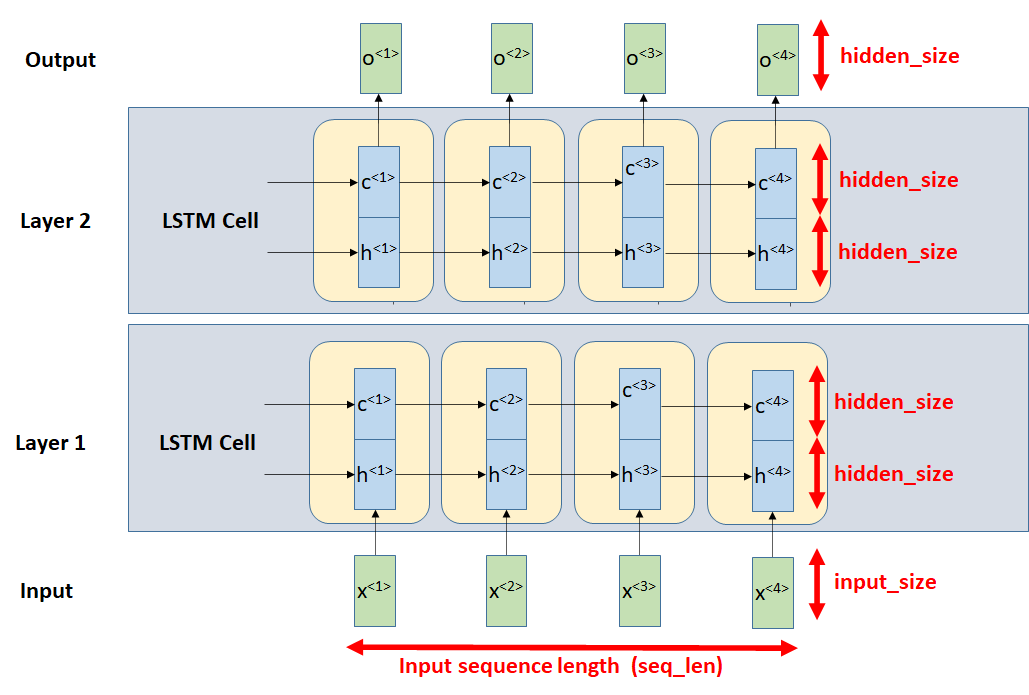

### The `torch.nn.LSTM` module

```
output = torch.nn.LSTM(input_size, hidden_size, num_layers, batch_first, dropout, bidirectional)
```

* Parameters:
    * **input_size** – The number of expected features in the input `x`. 
    * **hidden_size** – The number of features in the hidden state `h`.
    * **num_layers** – Number of recurrent layers. E.g., setting `num_layers=2` would mean stacking two LSTMs together to form a *stacked LSTM*, with the second LSTM taking in outputs of the first LSTM and computing the final results. Default: 1
    * **batch_first** – If `True`, then the input and output tensors are provided as `(batch, seq, feature)`. Default: `False`
    * **dropout** – If non-zero, introduces a *Dropout* layer on the outputs of each LSTM layer except the last layer, with dropout probability equal to `dropout`. Default: `0`
    * **bidirectional** – If `True`, becomes a bidirectional LSTM. Default: `False`
    

* Inputs: input, (h_0, c_0)
    * **input** of shape `(seq_len, batch, input_size)` (default) or `(batch, seq, feature)` (when `batch_first` is set to True): tensor containing the features of the input sequence. 
    * **h_0** of shape `(num_layers*num_directions, batch, hidden_size)`: tensor containing the initial hidden state for each element in the batch. If the LSTM is bidirectional, num_directions shoudl be 2, else it should be 1.
    * **o_0** of shape `(num_layers*num_directions, batch, hidden_size)`: tensor containing the initial cell state for each element in the batch


* Outputs: output, (h_n, c_n)
    * **out** of shape `(seq_len, batch_num, num_directions*hidden_size)`: tensor containing the output features from the last layer of the LSTM for each `t`. 
    * **h_n** of shape `(num_layers*num_directions, batch, hidden_size)`: hidden state for the last time step `t = seq_len`
    * **o_n** of shape `(num_layers*num_directions, batch, hidden_size)`: cell state for the last time step `t = seq_len`

### Input Format for the LSTM layer

There are two input format for the LSTM layer:

| `batch_first` | Shape of the input matrix | Description |
|:---:|:---:|:---:|
| `False` | `(seq_len, batch_size, input_size)` | (seq, batch, fea) |
| `True` |  `(batch_size, seq_len, input_size)` | (batch, seq, fea) |

* **seq first** (`batch_first=False`): The first format defines *time* as the first dimension. Implementing a `for` loop on the seq-first data allows us to process **one time step at a time** for **all samples**.
* **batch first** (`batch_first=True`): The second format defines the *batch sample* as the first dimension. Implementing a `for` loop on a batch-first  data allows us to process **one sample at a time** for **all time steps**.

### Creating LSTM

Create an LSTM layer with `hidden_size=64` units and accepts input samples with input dimension `input_size=128`. To use the 1st format, we shall set **`batch_first = False`** (this is actually the default settings).

In [ ]:
# ...

When you create an LSTM layer, there is **no** need to specify **the length of the input sequence** or the **length of output sequence**. All you need to do is to define the internal structures of the network. 

## 2. Simple Inference with LSTM

### Creating the input

Since we set `batch_first=False`, the input is a tensor of shape `(inseq_len, batch_size, input_size)`. To test the code, we generate some dummy input to test our LSTM layer. In the following, create a dummy input with a *batch size* 4 and *input sequence length* 5.

In [ ]:
# ...

### Initializing hidden and cell states

By default, the input to the first hidden and cell states are reset to 0. We can also initialize these two states. To do so, we prepare the tuples `(hidden_state, cell_state)` where both `hidden_state` and `cell_state` have the shape of `(num_layers, batch_size, hidden_state)` where the number of layers is set to 1. 

In [ ]:
# ...

### Performing inference

In the following, we shall use the input that we generate previously to perform inference.

* The shape of `output` is `(seq_len, batch_size, hidden_size)` where the output at each time step has a size of `hidden_size`.
* The shape of `out_hidden_state` and `out_cell_state` are (`num_layers, batch_size, hidden_size)`

In [ ]:
# ...

## Input with different time sequence

The model can accept input sequence of different length.

Consider inseq_len = 20

In [ ]:
# ...

Consider inseq_len = 30

In [ ]:
# ...

Consider inseq_len = 50

In [1]:
# ...

---

## Exercise

1. Create the LSTM layer for the following image. 
    * Use the **batch first** data format. 
    * Create a random input sequence `x` with batch size `B=16` and input sequence length `T=25` from a normal distribution (`torch.randn`). 
    * Create a random input states (`init_hidden_states`, `init_cell_states`) from a normal distribution (`torch.randn`)  
    * Perform the inference with the generated random input
    * Lastly, print the shape of the (1) generated output sequence, (2) output hidden state and (3) output cell state.

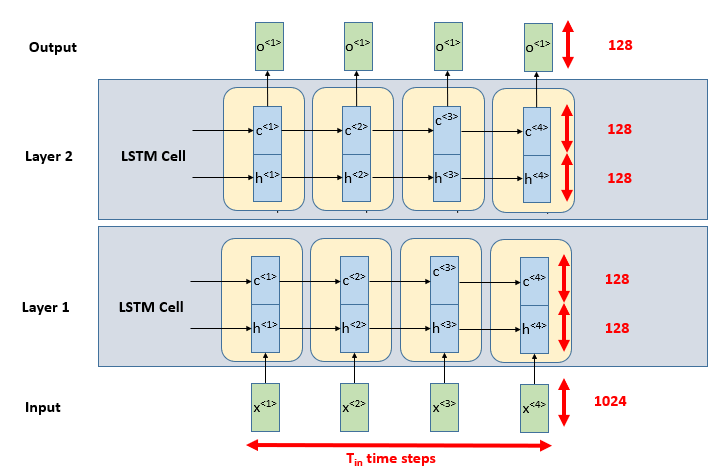

In [ ]:
# ...